In [50]:
%matplotlib inline

import os
os.chdir("/Volumes/WorkDrive/gimmeSAD")

import matplotlib.pyplot as plt
import macroeco as meco
import pandas as pd
import numpy as np
import implicit_BI
import gimmeSAD


In [32]:
data = implicit_BI.implicit_BI()
data.set_metacommunity("metacommunity_LS4.txt")
data.prepopulate(mode="volcanic")
data.step(50000)
data.simulate_seqs()
sp = data.get_species()
print(sp)

[<species Ataenius barbita>, <species Brachycorynella cerasi>, <species Dichomeris blackburni>, <species Cimex retentus>, <species Hypnoidus californica>, <species Phyllobius abbreviatus>, <species Dolichovespula thuiella>, <species Marmara consobrina>, <species Dolichurus ambiens>, <species Cryptococcus websteri>, <species Xylosandrus fagisuga>, <species Pheidole fasciatus>, <species Tischeria audax>, <species Bombus punctella>, <species Bombus conjugella>, <species Actebia egena>]


In [44]:
names = [x.name for x in sp]
abund = [x.abundance for x in sp]
sad_df = pd.DataFrame(np.array([names, abund]).T, columns=["spp", "y"])
sad_df['y'] = pd.to_numeric(sad_df['y'])
print(sad_df)

                        spp     y
0          Ataenius barbita     3
1    Brachycorynella cerasi     2
2     Dichomeris blackburni     2
3            Cimex retentus     3
4     Hypnoidus californica     3
5    Phyllobius abbreviatus     1
6   Dolichovespula thuiella  9955
7        Marmara consobrina     1
8        Dolichurus ambiens     3
9     Cryptococcus websteri     3
10     Xylosandrus fagisuga     2
11       Pheidole fasciatus     6
12          Tischeria audax     5
13         Bombus punctella     1
14        Bombus conjugella     5
15            Actebia egena     5


In [47]:
print(sad_df['y'])
p = meco.models.logser.fit_mle(sad_df['y'])
print(p)
logser_aic = meco.compare.AIC(sad_df['y'], meco.models.logser(p[0]))
print(logser_aic)
broken_stick_aic = meco.compare.AIC(sad_df['y'], meco.models.nbinom_ztrunc(np.mean(sad_df['y']), 1))
print(broken_stick_aic)

0        3
1        2
2        2
3        3
4        3
5        1
6     9955
7        1
8        3
9        3
10       2
11       6
12       5
13       1
14       5
15       5
Name: y, dtype: int64
(0.9998137356858169,)
121.621149733
242.90551605


<function matplotlib.pyplot.show>

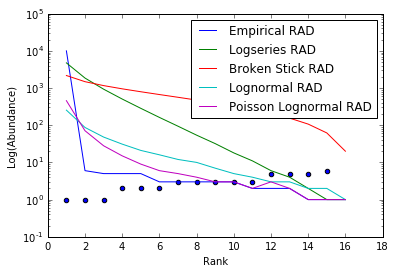

In [79]:
logser_rad = meco.models.logser.rank(len(sad_df), p)
broken_stick_rad = meco.models.nbinom_ztrunc.rank(len(sad_df), np.mean(sad_df['y']), 1)

mu, s = meco.models.plnorm_ztrunc.fit_mle(sad_df['y'])
plnorm_rad = meco.models.plnorm_ztrunc.rank(len(sad_df), mu, s)

mu, s = meco.models.lognorm.fit_mle(sad_df['y'])
lognorm_rad = meco.models.plnorm_ztrunc.rank(len(sad_df), mu, s)

ranks = np.arange(1, len(sad_df['y']) + 1)
broken_stick_rad = meco.models.nbinom_ztrunc.rank(len(sad_df), np.mean(sad_df['y']), 1)
plt.scatter(ranks, np.sort(sad_df['y']))
plt.semilogy(ranks, np.sort(sad_df['y'])[::-1], label="Empirical RAD")
plt.semilogy(ranks, logser_rad[::-1], label="Logseries RAD")
plt.semilogy(ranks, broken_stick_rad[::-1], label="Broken Stick RAD")
plt.semilogy(ranks, lognorm_rad[::-1], label="Lognormal RAD")
plt.semilogy(ranks, plnorm_rad[::-1], label="Poisson Lognormal RAD")
plt.xlabel("Rank")
plt.ylabel("Log(Abundance)")
plt.legend()
plt.show

In [64]:
plnorm = meco.models.plnorm.fit_mle(sad_df['y'])
lnorm = meco.models.lognorm.fit_mle(sad_df['y'])
print(plnorm)
print(lnorm)

(1.3534146967014884, 2.1970767967360967)
(1.4623939421073802, 2.076461773996567)


In [70]:
print(ranks, logser_rad[::-1])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]), array([  4.73600000e+03,   1.85000000e+03,   9.30000000e+02,
         5.05000000e+02,   2.84000000e+02,   1.62000000e+02,
         9.40000000e+01,   5.40000000e+01,   3.20000000e+01,
         1.80000000e+01,   1.10000000e+01,   6.00000000e+00,
         4.00000000e+00,   2.00000000e+00,   1.00000000e+00,
         1.00000000e+00]))


In [71]:
np.version

<module 'numpy.version' from '/usr/local/opt/anaconda/lib/python2.7/site-packages/numpy/version.pyc'>

In [77]:
print(np.version.version)

1.10.4
